In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Define Constants and Discretize the System

In [3]:
h = 1
m = 1
L = 1
n_points = 2000

In [4]:
space = np.linspace(-L/2, L/2, num=n_points)

# Construct the Laplacian Matrix

In [5]:
def calc_laplacian(n, L=1):
    """
    Constructs an n by n Laplacian matrix.

    Parameters:
        n: the dimension of the Laplacian matrix
        L: the width of the infinite potential wall in Bohr radii

    Returns:
        The Laplacian matrix with shape (n, n)
    """
    I = np.identity(n) # create the identity matrix
    I_off_diag = np.array([
        [1 if (j==i-1 or j==i+1) else 0 for j in np.arange(n)]
        for i in np.arange(n)
    ]) # create the off-diagonal matrix
    laplacian = (-2*I + I_off_diag) / ((L/(n-1))**2) # calculate the laplacian
    # delta x = L/(n-1) since there are n-1 spaces between n points
    return laplacian

In [6]:
calc_laplacian(5)*((1/4)**2)

array([[-2.,  1.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  1., -2.]])

In [7]:
laplacian = calc_laplacian(n_points)
laplacian

array([[-7992002.,  3996001.,        0., ...,        0.,        0.,
               0.],
       [ 3996001., -7992002.,  3996001., ...,        0.,        0.,
               0.],
       [       0.,  3996001., -7992002., ...,        0.,        0.,
               0.],
       ...,
       [       0.,        0.,        0., ..., -7992002.,  3996001.,
               0.],
       [       0.,        0.,        0., ...,  3996001., -7992002.,
         3996001.],
       [       0.,        0.,        0., ...,        0.,  3996001.,
        -7992002.]], shape=(2000, 2000))

# Construct the Hamiltonian Matrix

In [8]:
hamiltonian = -(h**2)/(2*m)*laplacian

In [9]:
hamiltonian

array([[ 3996001. , -1998000.5,       -0. , ...,       -0. ,       -0. ,
              -0. ],
       [-1998000.5,  3996001. , -1998000.5, ...,       -0. ,       -0. ,
              -0. ],
       [      -0. , -1998000.5,  3996001. , ...,       -0. ,       -0. ,
              -0. ],
       ...,
       [      -0. ,       -0. ,       -0. , ...,  3996001. , -1998000.5,
              -0. ],
       [      -0. ,       -0. ,       -0. , ..., -1998000.5,  3996001. ,
        -1998000.5],
       [      -0. ,       -0. ,       -0. , ...,       -0. , -1998000.5,
         3996001. ]], shape=(2000, 2000))

# Solve for Eigenvalues and Eigenfunctions

In [10]:
eig_results = np.linalg.eig(hamiltonian)

In [11]:
eig_results

EigResult(eigenvalues=array([7952176.29555171, 7953054.96197845, 7953923.87452416, ...,
         52134.9529054 ,  251102.56525919,  133333.40641109],
      shape=(2000,)), eigenvectors=array([[ 0.00445236, -0.00440322, -0.00435406, ...,  0.00509022,
         0.0110303 ,  0.0080986 ],
       [-0.00881598,  0.0087206 ,  0.00862514, ...,  0.01004763,
         0.02067434,  0.01565675],
       [ 0.01300387, -0.012868  , -0.01273184, ...,  0.01474285,
         0.02772009,  0.02217007],
       ...,
       [ 0.01300387,  0.012868  , -0.01273184, ...,  0.01474285,
         0.02772009,  0.02217007],
       [-0.00881598, -0.0087206 ,  0.00862514, ...,  0.01004763,
         0.02067434,  0.01565675],
       [ 0.00445236,  0.00440322, -0.00435406, ...,  0.00509022,
         0.0110303 ,  0.0080986 ]], shape=(2000, 2000)))

In [12]:
class Eigenvector:
    """
    Class for storing eigenvectors paired with their eigenvalues
    """
    def __init__(self, eigenvalue, eigenvector):
        self.eigenvalue = eigenvalue
        self.eigenvector = eigenvector
        
    def calculate_wavefunction(self, dx):
        """
        Normalizes the eigenvector so that the integral of its square is 1

        Parameters:
            dx: the spacing between adjacent points on a discretized grid 
        """
        integral = np.sum((self.eigenvector**2)*dx)
        # Divide by the normalization factor so that integral becomes 1
        self.wavefunction = self.eigenvector/np.sqrt(integral)

In [13]:
eig_results[1]

array([[ 0.00445236, -0.00440322, -0.00435406, ...,  0.00509022,
         0.0110303 ,  0.0080986 ],
       [-0.00881598,  0.0087206 ,  0.00862514, ...,  0.01004763,
         0.02067434,  0.01565675],
       [ 0.01300387, -0.012868  , -0.01273184, ...,  0.01474285,
         0.02772009,  0.02217007],
       ...,
       [ 0.01300387,  0.012868  , -0.01273184, ...,  0.01474285,
         0.02772009,  0.02217007],
       [-0.00881598, -0.0087206 ,  0.00862514, ...,  0.01004763,
         0.02067434,  0.01565675],
       [ 0.00445236,  0.00440322, -0.00435406, ...,  0.00509022,
         0.0110303 ,  0.0080986 ]], shape=(2000, 2000))

In [14]:
# organize the results
eigenvectors = []
for i in range(len(eig_results[0])):
    this_eig = Eigenvector(eig_results[0][i], eig_results[1][:, i])
    eigenvectors.append(this_eig)

In [15]:
# sort by eigenvalue
sorted_egvecs = sorted(
    eigenvectors, 
    key=lambda eigenvector: eigenvector.eigenvalue
)

In [16]:
first_7_E = sorted_egvecs[:7]

# Plot the results

In [17]:
dx = L/(n_points-1) # n-1 spacing between n points

In [18]:
# normalize the wavefunctions
[first_7_E[i].calculate_wavefunction(dx) for i in range(len(first_7_E))]

[None, None, None, None, None, None, None]

In [19]:
def plot_wf(ax, eig):
    ax.plot(space, eig.wavefunction, label=f'Energy: {eig.eigenvalue:.2f}')

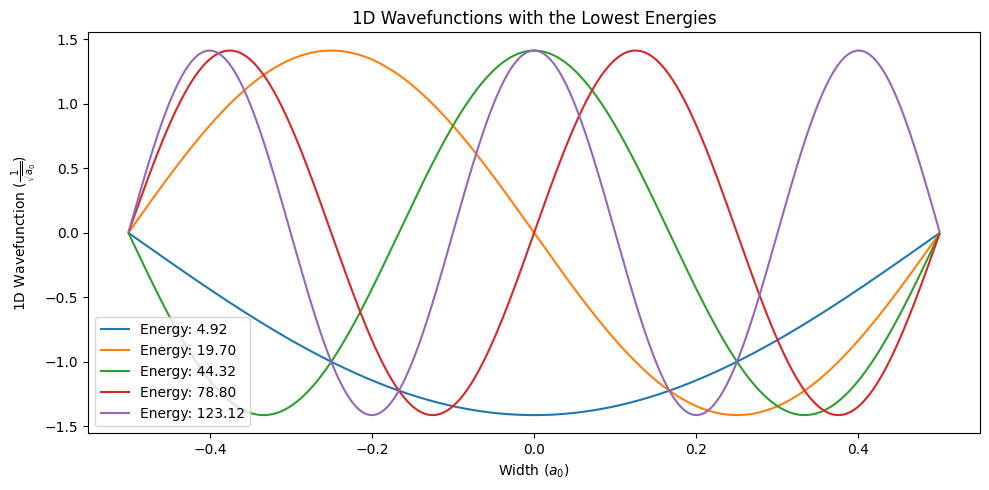

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
for i, eig in enumerate(first_7_E[:5]):
    plot_wf(ax, eig)
ax.set_xlabel('Width ($a_0$)')
ax.set_ylabel("1D Wavefunction ($\\frac{1}{\\sqrt{a_0}}$)")
ax.set_title("1D Wavefunctions with the Lowest Energies")
plt.tight_layout()
plt.legend()

Very Cool!